<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

data_full = pd.read_csv('gold_recovery_full.csv', index_col=[0])
data_train = pd.read_csv('gold_recovery_train.csv', index_col=[0])
data_test = pd.read_csv('gold_recovery_test.csv', index_col=[0])

print('Обучающая выборка')
print('Размерность:', data_train.shape)
print()

print('Общая информация:', data_train.info())
print()

display(data_train.head(20))
print()

print('Общий процент пропусков по характеристикам')
print(data_train.isnull().sum().sort_values(ascending = False).head(20)*100/len(data_train))
print()

print('Проверка дубликатов, итого')
print(data_train.duplicated().sum())
print()

print('rougher.recovery:')
print(data_train['rougher.output.recovery'].describe())
print()

print('final.recovery:')
print(data_train['final.output.recovery'].describe())



Обучающая выборка
Размерность: (16860, 87)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol           

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



Общий процент пропусков по характеристикам
rougher.output.recovery                     15.260973
rougher.output.tail_ag                      13.345196
rougher.output.tail_sol                     13.339265
rougher.output.tail_au                      13.339265
secondary_cleaner.output.tail_sol           11.779359
rougher.input.floatbank11_xanthate          11.293001
final.output.recovery                        9.021352
primary_cleaner.input.sulfate                7.752076
primary_cleaner.input.depressant             7.485172
rougher.calculation.au_pb_ratio              7.366548
rougher.input.floatbank10_sulfate            6.192171
primary_cleaner.input.xanthate               5.842230
primary_cleaner.output.concentrate_sol       3.772242
rougher.input.floatbank11_sulfate            3.695136
rougher.state.floatbank10_e_air              3.576512
rougher.input.feed_rate                      3.042705
rougher.input.feed_size                      2.473310
final.output.concentrate_sol          

Первые выводы по обучающей выборке:
- 16860 строк, 87 параметров
- 87 параметров, отвечающих за входные и выходные параметры сырья, состояние процесса, промежуточные расчеты. Информация приведена для каждого из состояний технологического процесса, флотация, промежуточный результат, первичная и вторичная обработка, итоговый результат.
- из параметров все, кроме даты, имеют нужный тип float
- Часть данных пропущена, по 6 параметрам процееса количество пропусков превышает 10%, наибольшее количество (15.3%) - в строке эффективности обогащения на промежуточном этапе
- дубликатов не найдено
- Средняя эфективность обогащения на промежуточном этапе составляет 82%, но при этом есть выбросы (наблюдаются нулевые значения), разберемс что с ними делать позднее.
- Аналогично для эффективности обогащения после первой и второй очистки

In [2]:
print('Тестовая выборка')
print('Размерность:', data_test.shape)
print()

print('Общая информация:', data_test.info())
print()

display(data_test.head(20))
print()

print('Общий процент пропусков по характеристикам')
print(data_test.isnull().sum().sort_values(ascending = False).head(20)*100/len(data_test))
print()

print('Проверка дубликатов, итого')
print(data_test.duplicated().sum())


Тестовая выборка
Размерность: (5856, 53)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air     

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255



Общий процент пропусков по характеристикам
rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatba

Первые выводы по тестовой выборке:
- 5856 строк (около трети от обучающей), 53 параметра
- Отсутствуют параметры, отвечающие за промежуточные вычисления (фаза флотации), и выходные (output) параметры для всех фаз очистки.
- из параметров все, кроме даты, имеют нужный тип float
- Количество пропусков существенно ниже, чем в обучающей выборке, всего по 7 параметрам процесса количество пропусков превышает 1% (макисум - 6% для параметра), все относятся к входным данным по подпроцессам очистки.
- дубликатов не найдено

In [3]:
print('Исходные данные')
print('Размерность:', data_full.shape)
print()

print('Общая информация:', data_full.info())
print()

display(data_full.head(20))
print()

print('Общий процент пропусков по характеристикам')
print(data_full.isnull().sum().sort_values(ascending = False).head(20)*100/len(data_full))
print()

print('Проверка дубликатов, итого')
print(data_full.duplicated().sum())

print('Проверка дубликатов по дате, итого')
print(data_full['date'].duplicated().sum())
print()

print('rougher.recovery:')
print(data_train['rougher.output.recovery'].describe())
print()

print('final.recovery:')
print(data_train['final.output.recovery'].describe())



Исходные данные
Размерность: (22716, 87)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



Общий процент пропусков по характеристикам
rougher.output.recovery                   13.730410
rougher.output.tail_ag                    12.048776
rougher.output.tail_au                    12.044374
rougher.output.tail_sol                   12.044374
rougher.input.floatbank11_xanthate         9.935728
secondary_cleaner.output.tail_sol          9.750836
final.output.recovery                      8.641486
rougher.calculation.au_pb_ratio            7.162353
primary_cleaner.input.sulfate              7.083113
primary_cleaner.input.depressant           6.805776
rougher.input.floatbank10_sulfate          5.727241
primary_cleaner.input.xanthate             5.066913
primary_cleaner.output.concentrate_sol     3.512942
rougher.input.floatbank11_sulfate          2.984680
rougher.state.floatbank10_e_air            2.729354
rougher.input.feed_rate                    2.434407
rougher.input.floatbank10_xanthate         2.064624
primary_cleaner.output.concentrate_pb      1.972178
rougher.input.feed_s

Первые выводы по исходной выборке:
- 22716 строк (сумма строк по 2 рассмотренным выборкам), 87 параметров (аналогично обучающей)
- С типами данных также порядок
- Часть данных пропущена, по 4 параметрам процееса количество пропусков превышает 10%, наибольшее количество (13.7%) - в строке эффективности обогащения на промежуточном этапе. Но важный вывод состоит в том, что в исходной выборке, в отличии от тестовой, есть значения эффективности обогащения как после этапа флотация, так и итоговая.
- полных дубликатов не найдено, как и частичных (по дате).
- Средняя эфективность обогащения на промежуточном этапе и итоговая - примерно как и на обучющей выборке, что говорит нам о том, что значения таргетов в тестовой выборки схожие с обучающей, для моделирования это обнадеживает.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между вашими расчётами и значением признака:


In [4]:
data_train['recovery_check'] = 100*data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))

data_train['mae_recovery'] = abs(data_train['recovery_check'] - data_train['rougher.output.recovery'])
mae = data_train['mae_recovery'].mean()
print('MAE составляет:', mae)
print()
#data_train.info()
print(data_train['mae_recovery'].describe())


MAE составляет: 1.1113637871366354e-14

count    1.428700e+04
mean     1.111364e-14
std      1.075518e-14
min      0.000000e+00
25%      0.000000e+00
50%      1.421085e-14
75%      1.421085e-14
max      5.684342e-14
Name: mae_recovery, dtype: float64


МАЕ мы смогли посчитать по 14287 значениям, при среднем значении в 80+ МАЕ составил 1,13 на 10 в минус 14ой степени, что явно лежит в пределах погрешности вычислений.

Как уже было отмечено ранее, в тестовой вборке отсутствуют следующие параметры:
- На этапе флотации: 4 расчетных параметра (концентрации и соотношения определенных веществ), 8 выходных параметров описывающих характеристики продукта (концентрацию веществ и характеристики отвалов), и recovery.
- На этапе перичной очистки: те же 8 выходных параметров
- На этапе вторичной очистки: 4 выходных параметра с характеристиками отвалов
- На итоговом этапе: 8 выходных параметров (концентрация веществ и характеристики отвалов) и recovery после двух этапов очистки.


In [5]:
#удалим добавленные нами столбцы
data_train = data_train.drop(['recovery_check', 'mae_recovery'], axis = 1)

train_list = data_train.columns
test_list = data_test.columns

list = []
for column_name in train_list:
    if not column_name in test_list:
        list.append(column_name)
print(list)
print(len(list))

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

С учетом того, что типы данных готовы для обучения моделей, остается не решенным вопрос пропущенных значений. Как мы помним, данных пропущено сравнительно немного, до 15% от значений конкретного параметра, а в среднем - не более 1 процента. С учетом того, что данные приведены в хронологическом порядке и отражают изменение состояние процесса, наиболее логично заполнить пропущенные значения параметров значениями из предыдущей строки (наблюдаемые часом ранее). 

Следующим шагом избавимся от двух созданных ранее столбцов в обучающей выборке.

После этого, поскольку ранее мы выяснили, что дубликатов в исходной выборке по столбцу date нет, добавим к тестовой выборке значения recovery после процесса флотации и итоговое для последующей проверки.

In [6]:
#добавим в data_test целевые признаки из исходной выборки
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')

# проверим сколько нулей в целевых признаках:
print(data_train[data_train['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_test[data_test['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_train[data_train['final.output.recovery'] == 0]['final.output.recovery'].count())
print(data_test[data_test['final.output.recovery'] == 0]['final.output.recovery'].count())

#И очистим данные ряды перед заполнением остальных пропусков:
data_train = data_train[data_train['rougher.output.recovery'] != 0].reset_index(drop=True)
data_train = data_train[data_train['final.output.recovery'] != 0].reset_index(drop=True)
data_test = data_test[data_test['rougher.output.recovery'] != 0].reset_index(drop=True)
data_test = data_test[data_test['final.output.recovery'] != 0].reset_index(drop=True)

#проверка
print(data_train[data_train['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_test[data_test['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_train[data_train['final.output.recovery'] == 0]['final.output.recovery'].count())
print(data_test[data_test['final.output.recovery'] == 0]['final.output.recovery'].count())


320
99
89
62
0
0
0
0


In [7]:

###############################################
#сколько пропущенных значений
#data_train.info()
print(data_train['rougher.output.recovery'].isna().sum())
print(data_test['rougher.output.recovery'].isna().sum())
print(data_train['final.output.recovery'].isna().sum())
print(data_test['final.output.recovery'].isna().sum())
print()

#С пропусками придется попрощаться..
data_train = data_train[data_train['rougher.output.recovery'].isna() == False].reset_index(drop=True)
print(data_train['rougher.output.recovery'].isna().sum())
data_test = data_test[data_test['rougher.output.recovery'].isna() == False].reset_index(drop=True)
print(data_test['rougher.output.recovery'].isna().sum())
data_train = data_train[data_train['final.output.recovery'].isna() == False].reset_index(drop=True)
print(data_train['rougher.output.recovery'].isna().sum())
data_test = data_test[data_test['final.output.recovery'].isna() == False].reset_index(drop=True)
print(data_test['rougher.output.recovery'].isna().sum())

data_train.info()
data_test.info()

2542
524
1498
440

0
0
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13795 entries, 0 to 13794
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13795 non-null  object 
 1   final.output.concentrate_ag                         13794 non-null  float64
 2   final.output.concentrate_pb                         13794 non-null  float64
 3   final.output.concentrate_sol                        13586 non-null  float64
 4   final.output.concentrate_au                         13795 non-null  float64
 5   final.output.recovery                               13795 non-null  float64
 6   final.output.tail_ag                                13795 non-null  float64
 7   final.output.tail_pb                                13695 non-null  float64
 8   final.output.tail_sol                            

In [8]:
data_train = data_train.fillna(method = 'ffill')

#проверка
print(data_train.info())
print()

#data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')
data_test = data_test.fillna(method = 'ffill')
print(data_test.info())
print(data_test['rougher.output.recovery'].describe())
print()
print(data_test['final.output.recovery'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13795 entries, 0 to 13794
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13795 non-null  object 
 1   final.output.concentrate_ag                         13795 non-null  float64
 2   final.output.concentrate_pb                         13795 non-null  float64
 3   final.output.concentrate_sol                        13795 non-null  float64
 4   final.output.concentrate_au                         13795 non-null  float64
 5   final.output.recovery                               13795 non-null  float64
 6   final.output.tail_ag                                13795 non-null  float64
 7   final.output.tail_pb                                13795 non-null  float64
 8   final.output.tail_sol                               13795 non-null  float64


## Анализ данных

 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Вычисления проведенм для исходной выборки, которая содержит больше значений.

Медианная концентрация золота по этапам:
Исходное сырье: 7.88483179906713


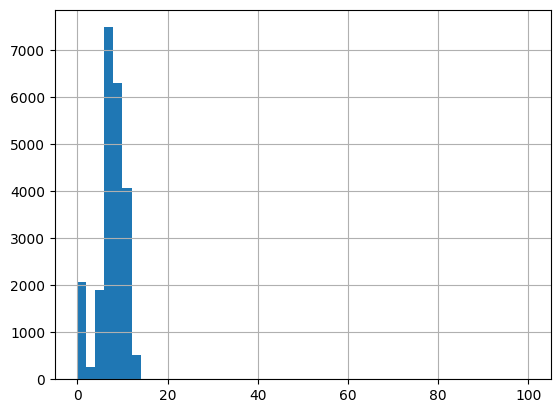

После флотации: 20.003201585148012


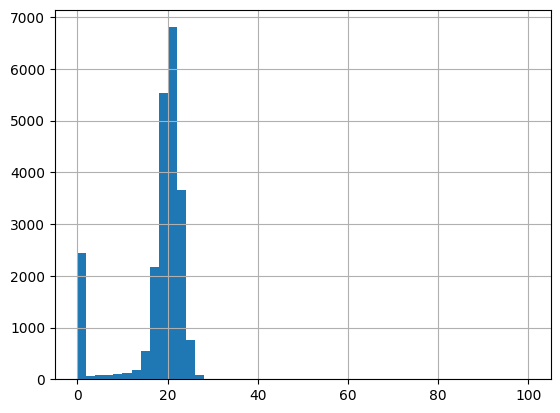

После первичной очистки: 32.359813117181226


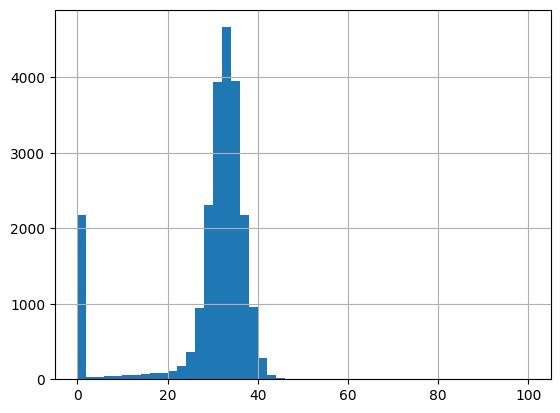

После вторичной очистки: 44.65343597067188


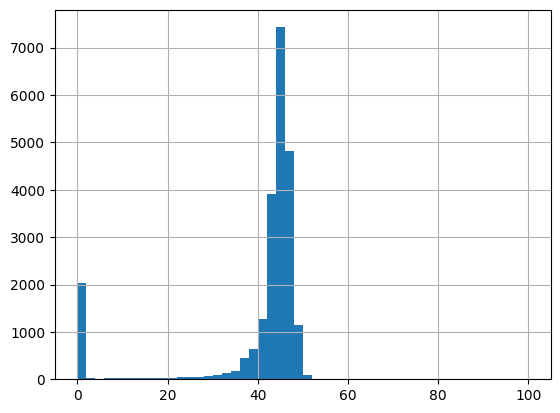

In [9]:
#Au
print('Медианная концентрация золота по этапам:')

print('Исходное сырье:', data_full['rougher.input.feed_au'].median())
data_full['rougher.input.feed_au'].hist(bins=50, range = (0, 100))
plt.show()
print('После флотации:', data_full['rougher.output.concentrate_au'].median())
data_full['rougher.output.concentrate_au'].hist(bins=50, range = (0, 100))
plt.show()
print('После первичной очистки:', data_full['primary_cleaner.output.concentrate_au'].median())
data_full['primary_cleaner.output.concentrate_au'].hist(bins=50, range = (0, 100))
plt.show()
print('После вторичной очистки:', data_full['final.output.concentrate_au'].median())
data_full['final.output.concentrate_au'].hist(bins=50, range = (0, 100))
plt.show()
print()


Оценка концентрации золота и по средним, и по медианным значениям показывает следующее: после флотации концентрация составляет порядка 20% (увеличение в 2,5 раза относительно исходного сырья), первая очистка позволяет увеличить концентрацию чуть более чем в полтора раза, после вторичной очистки концентрация вырастает еще почти на 12% до итоговых 44 процентов.

Медианная концентрация серебра по этапам:
Исходное сырье: 8.302613069580602


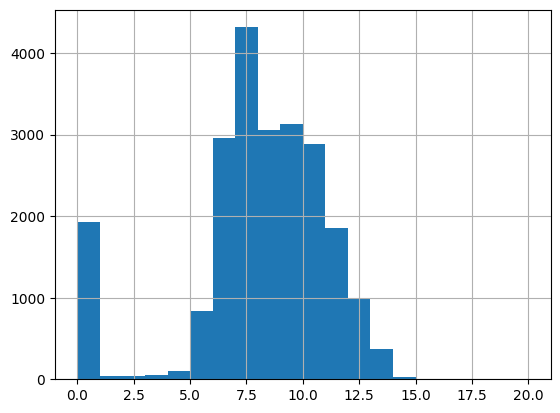

После флотации: 11.785126843749236


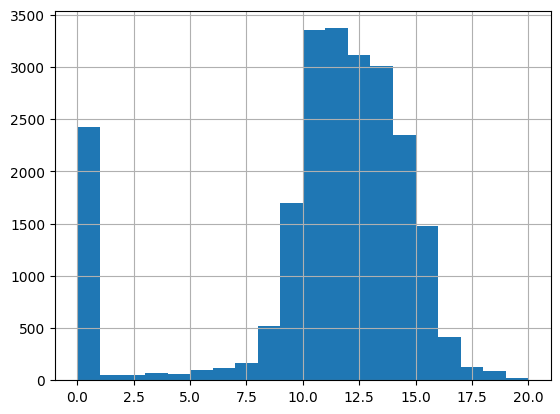

После первичной очистки: 8.26564348298084


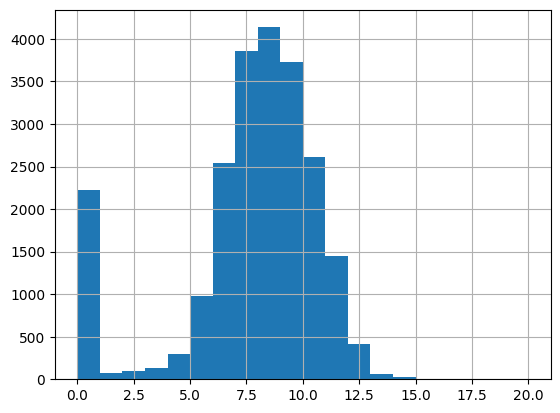

После вторичной очистки: 4.9537289473495845


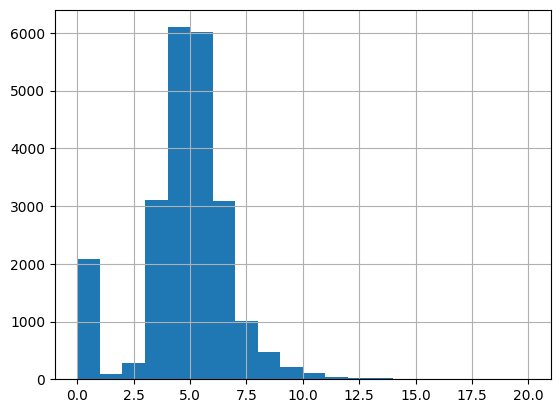

In [10]:
#Ag
print('Медианная концентрация серебра по этапам:')
print('Исходное сырье:', data_full['rougher.input.feed_ag'].median())
data_full['rougher.input.feed_ag'].hist(bins=20, range = (0, 20))
plt.show()
print('После флотации:', data_full['rougher.output.concentrate_ag'].median())
data_full['rougher.output.concentrate_ag'].hist(bins=20, range = (0, 20))
plt.show()
print('После первичной очистки:', data_full['primary_cleaner.output.concentrate_ag'].median())
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=20, range = (0, 20))
plt.show()
print('После вторичной очистки:', data_full['final.output.concentrate_ag'].median())
data_full['final.output.concentrate_ag'].hist(bins=20, range = (0, 20))
plt.show()
print()

Концентрация серебра сначала также растет (относительно исходного сырья), затем начинает снижаться на каждом из следующих этапов, и падает с 11.8% до итоговых 5%. При этом на второй этап очистки чуть менее эффективен по сравнению с первым. 

Медианная концентрация свинца по этапам:
Исходное сырье: 3.4320542022917007


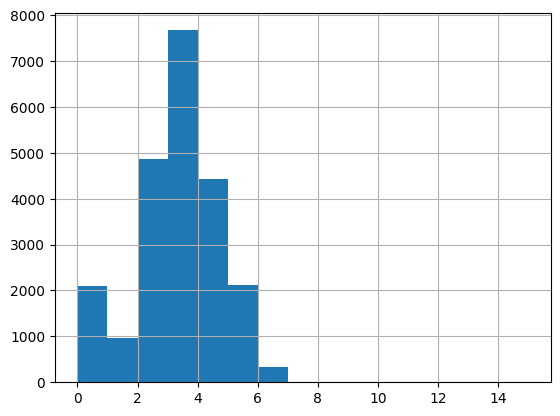

После флотации: 7.572854680346531


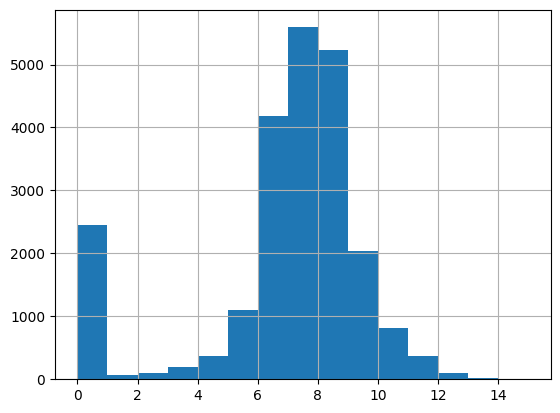

После первичной очистки: 9.921116466257306


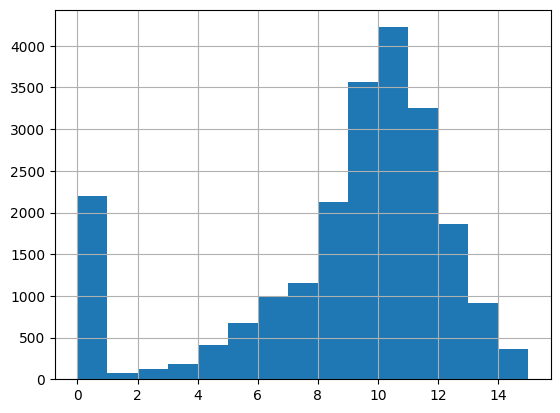

После вторичной очистки: 9.914518724547492


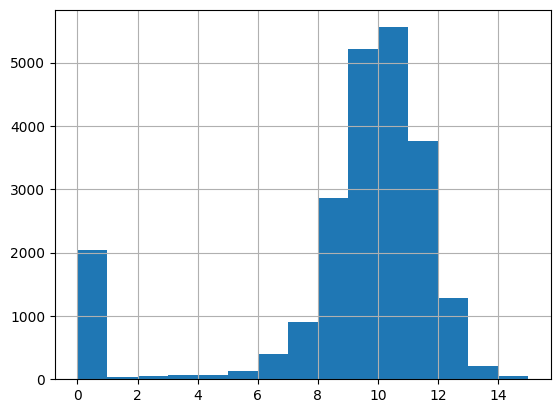

In [11]:
#Pb
print('Медианная концентрация свинца по этапам:')
print('Исходное сырье:', data_full['rougher.input.feed_pb'].median())
data_full['rougher.input.feed_pb'].hist(bins=15, range = (0, 15))
plt.show()
print('После флотации:', data_full['rougher.output.concentrate_pb'].median())
data_full['rougher.output.concentrate_pb'].hist(bins=15, range = (0, 15))
plt.show()
print('После первичной очистки:', data_full['primary_cleaner.output.concentrate_pb'].median())
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=15, range = (0, 15))
plt.show()
print('После вторичной очистки:', data_full['final.output.concentrate_pb'].median())
data_full['final.output.concentrate_pb'].hist(bins=15, range = (0, 15))
plt.show()
print()

Побочный эффект, к сожалению концентрация свинца также растет при увеличении концентрации золота, но не столь существенно. Суммарно концентрация почти втрое, что почти в 2 раза меньше, чем для золота. И вторая ступень очистки практически никак не влияет на изменение концентрации свинца. 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Данные известны на момент "до проведения флотации" и "до перичной очистки".

Размер гранул поступающих на флотацию в обучающей и тестовой выборках:


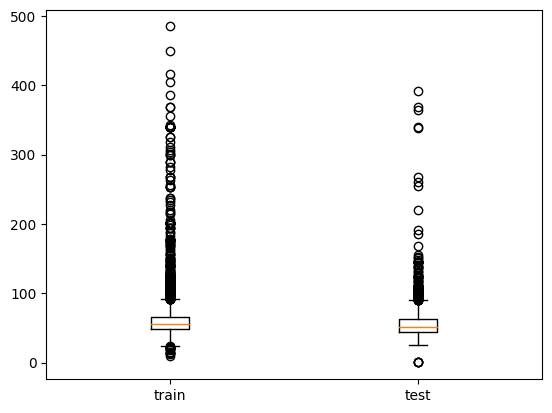

Размер гранул поступающих на первичную обработку в обучающей и тестовой выборках:


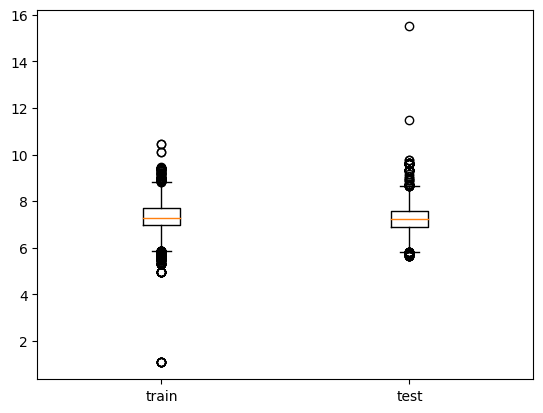

До флотации для обучающей выборки
count    13795.000000
mean        60.259521
std         23.085351
min          9.659576
25%         48.988998
50%         55.335156
75%         65.967318
max        484.967466
Name: rougher.input.feed_size, dtype: float64

До флотации для тестовой выборки
count    5154.000000
mean       56.033795
std        19.111802
min         0.046369
25%        43.907218
50%        51.165274
75%        62.508991
max       392.494040
Name: rougher.input.feed_size, dtype: float64

До первичной обработки для обучающей выборки
count    13795.000000
mean         7.323601
std          0.616106
min          1.080000
25%          6.960000
50%          7.300000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

До первичной обработки для тестовой выборки
count    5154.000000
mean        7.261054
std         0.607395
min         5.650000
25%         6.890000
50%         7.250000
75%         7.590000
max        15.500000
Name: p

In [12]:
print('Размер гранул поступающих на флотацию в обучающей и тестовой выборках:')
plt.boxplot([data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size']] , labels = ['train' , 'test'])
plt.show()

print('Размер гранул поступающих на первичную обработку в обучающей и тестовой выборках:')
plt.boxplot([data_train['primary_cleaner.input.feed_size'], data_test['primary_cleaner.input.feed_size']] , labels = ['train' , 'test'])
plt.show()

print('До флотации для обучающей выборки')
print(data_train['rougher.input.feed_size'].describe())
print()
print('До флотации для тестовой выборки')
print(data_test['rougher.input.feed_size'].describe())
print()

print('До первичной обработки для обучающей выборки')
print(data_train['primary_cleaner.input.feed_size'].describe())
print()
print('До первичной обработки для тестовой выборки')
print(data_test['primary_cleaner.input.feed_size'].describe())


Построив диаграмму boxplot существенных различий не видно, для уверенности воспользуемся также методом describe. Отметим, что распределения размеров исходного сырья несколько отличаются. На тестовой выборке и средние значения и стандартное отклонение ниже на 7-8% и 25% соответственно. Максимальные значения схожи, межквартильный размах - практически идентичный.

Размер сырья, поступающего на первичную обработку практически идентичен по всем параметрам (среднее, отклонение, квантили).

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.  Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии. au, ag, pb, sol



Концентрация до флотации в обучающей выборке:

count    13795.000000
mean        56.219933
std          6.989913
min          0.040000
25%         52.538724
50%         56.619236
75%         60.760588
max         74.458253
Name: conc_before_flot, dtype: float64



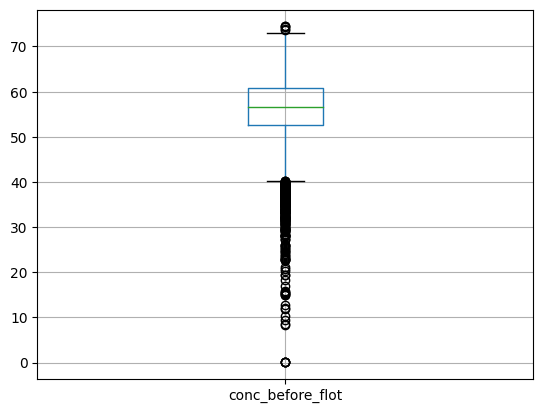

Итого околонулевых значений: 0

Концентрация после флотации в обучающей выборке:

count    13795.000000
mean        68.615688
std          8.096082
min          0.040000
25%         65.248019
50%         69.310903
75%         73.508255
max         88.140119
Name: conc_after_flot, dtype: float64



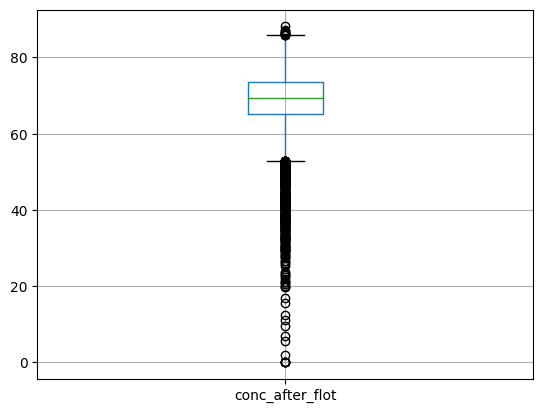

Итого околонулевых значений: 0

Концентрация после первичной очистки в обучающей выборке:

count    13795.000000
mean        60.121291
std         10.394789
min          0.000000
25%         58.039388
50%         61.730843
75%         65.305376
max         76.918076
Name: conc_after_1st, dtype: float64



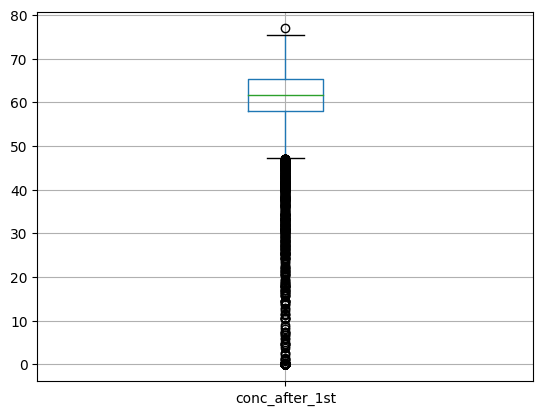

Итого околонулевых значений: 70

Концентрация итоговая в обучающей выборке:

count    13795.000000
mean        68.664585
std          5.432306
min          0.040000
25%         67.559772
50%         69.136193
75%         70.953745
max         80.210644
Name: conc_final, dtype: float64



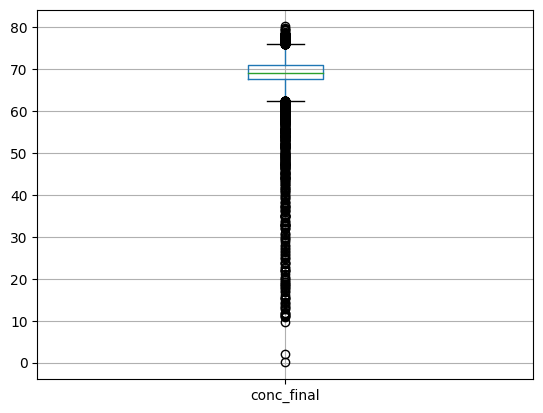

Итого околонулевых значений: 0

Концентрация до флотации в тестовой выборке:

count    5154.000000
mean       60.296362
std         6.807073
min         8.072476
25%        56.543971
50%        60.079961
75%        65.126030
max        76.978947
Name: conc_basic, dtype: float64



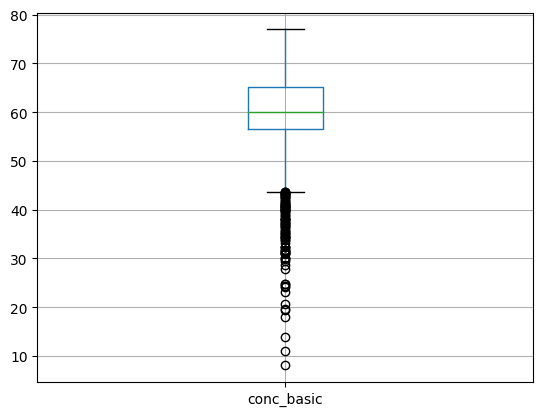

Итого околонулевых значений: 0



In [13]:
#data_train
data_train['conc_before_flot'] = data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol']
data_train['conc_after_flot'] = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol']
data_train['conc_after_1st'] = data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_sol']
data_train['conc_final'] = data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol']

def report(df, column):
    print()
    print(df[column].describe())
    print()
    df.boxplot(column = column)
    plt.show()
    print('Итого околонулевых значений:', df[df[column] < 0.01][column].count())
    print()

    
print('Концентрация до флотации в обучающей выборке:')
report(data_train, 'conc_before_flot')
print('Концентрация после флотации в обучающей выборке:')
report(data_train, 'conc_after_flot')
print('Концентрация после первичной очистки в обучающей выборке:')
report(data_train, 'conc_after_1st')
print('Концентрация итоговая в обучающей выборке:')
report(data_train, 'conc_final')



#data_test.info()
data_test['conc_basic'] = data_test['rougher.input.feed_au'] + data_test['rougher.input.feed_ag'] + data_test['rougher.input.feed_pb'] + data_test['rougher.input.feed_sol']
print('Концентрация до флотации в тестовой выборке:')
report(data_test, 'conc_basic')


Выводы по оценке совокупной концентрации для обучающей выборки: Исходная медианная концентрация для выборки составляет порядка 55%, после флотации она увеличивается до 68%, после первичной выборки падает до 61%, после вторичной доходит до 69%. Распределение совокупной концентрации схожее для обучающей и тестовой выборок, медиана составляет 56% и 59% соответственно, стандартное отклонение - 18 и 16.5. 

Для обучающей выборки на разных этапах количество строк с околонулевыми (менее 0.01) значениями составляет от 1200 до 1500, т.е. около 7% выборки, для тестовой - 371 (около 6-7%). Точные причины установить затруднительно, но вероятно был сбой работы системы оценки содержания металлов в сырье, или данные не записывались. В целях избавления от заведомо ложных признаков, удалим данные строки из обоих выборок, потеряв сравнительно небольшую часть данных.

In [14]:
#создаем новый df без строк с околонулевой суммарной концентрацией
df_train2 = data_train[(data_train['conc_before_flot'] >= 0.01) & (data_train['conc_after_flot'] >= 0.01) & (data_train['conc_after_1st'] >= 0.01)&(data_train['conc_final'] >= 0.01)].copy().reset_index(drop=True)
df_test = data_test[data_test['conc_basic'] >= 0.01].copy().reset_index(drop=True)

#оставляем идентичные признаки у обучающей и тестовой, удалив вспомогательные, дату, те, которых нет в тестовой
df_test = df_test.drop(['date', 'conc_basic'], axis = 1)
df_train = df_train2[df_test.columns].copy()



In [15]:
#подготовка target-features для модели на стадии флотации
#list = df_test.columns[:34][12:]
#print(list)

model1_features_train = df_train[df_test.columns[:34][12:]]
model1_target_train = df_train['rougher.output.recovery']
model1_features_test = df_test[df_test.columns[:34][12:]].copy()
model1_target_test = df_test['rougher.output.recovery']

model2_features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
model2_target_train = df_train['final.output.recovery']
model2_features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
model2_target_test = df_test['final.output.recovery']

#Проверка
print(model1_features_train.shape)
print(model1_target_train.shape)
print(model1_features_test.shape)
print(model1_target_test.shape)
print()
print(model2_features_train.shape)
print(model2_target_train.shape)
print(model2_features_test.shape)
print(model2_target_test.shape)


(13725, 22)
(13725,)
(5154, 22)
(5154,)

(13725, 52)
(13725,)
(5154, 52)
(5154,)


In [16]:
columns_list = []
for col in df_train.columns:
    if "rougher" in col:
        columns_list.append(col)
        
columns_list.remove('rougher.output.recovery')
print(columns_list)
print(len(columns_list))

['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']
22


In [17]:
#Функция sMAPE
def smape(target, predictions):
    count = 0
    target=np.array(target)
    predictions=np.array(predictions)
 
    for i in range(0, len(target)):
        count += 2 * abs(target[i] - predictions[i]) / (abs(target[i]) + abs(predictions[i]))
    return (count/len(target))


Проверим качество работы моделей на параметрах "по умолчанию". параллельно для валидации моделей будем считать метрику r2. 

In [18]:
lr1 = LinearRegression()
dtr1 = DecisionTreeRegressor(random_state = 12345)
rfr1 = RandomForestRegressor(random_state = 12345)

# посчитаем оценки, вызвав функцию cross_value_score с пятью блоками для линейной регрессии
my_scorer = make_scorer(smape, greater_is_better = True)

smape_scores_lr1 = cross_val_score(lr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_lr1 = cross_val_score(lr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели LR1:', smape_scores_lr1.mean())
print('Средняя оценка метрики R2 модели LR1:', r2_scores_lr1.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для решающего дерева с параметрами по умолчанию
smape_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели DTR1:', smape_scores_dtr1.mean())
print('Средняя оценка метрики R2 модели DTR1:', r2_scores_dtr1.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для случайного леса с параметрами по умолчанию
smape_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели RFR1:', smape_scores_rfr1.mean())
print('Средняя оценка метрики R2 модели RFR1:', r2_scores_rfr1.mean())
print()


Средняя оценка метрики sMAPE модели LR1: 0.07113018425426601
Средняя оценка метрики R2 модели LR1: -0.28268255778272977

Средняя оценка метрики sMAPE модели DTR1: 0.10370936206741854
Средняя оценка метрики R2 модели DTR1: -1.5359739525205636

Средняя оценка метрики sMAPE модели RFR1: 0.07879396650184634
Средняя оценка метрики R2 модели RFR1: -0.4689496858527986



Проведя валидацию видим, что r2 отрицательная у всех моделей, поэтому их точность никуда не годится. Поэтому перед подгоном параметров попробуем перемешать данные и провести заново оценку метрик, что может помочь с учетом того, что в признаках есть дублирующиеся строки, и они слабо отличаются у соседних по времени записей.

In [19]:
model1_features_train, model1_target_train = shuffle(model1_features_train, model1_target_train, random_state=12345)
model1_features_train = model1_features_train.reset_index(drop=True)
model1_target_train = model1_target_train.reset_index(drop=True)

lr1 = LinearRegression()
dtr1 = DecisionTreeRegressor(random_state = 12345)
rfr1 = RandomForestRegressor(random_state = 12345)

In [20]:
# посчитаем оценки, вызвав функцию cross_value_score с пятью блоками для линейной регрессии
smape_scores_lr1 = cross_val_score(lr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_lr1 = cross_val_score(lr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели LR1:', smape_scores_lr1.mean())
print('Средняя оценка метрики R2 модели LR1:', r2_scores_lr1.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для решающего дерева с параметрами по умолчанию
smape_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели DTR1:', smape_scores_dtr1.mean())
print('Средняя оценка метрики R2 модели DTR1:', r2_scores_dtr1.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для случайного леса с параметрами по умолчанию
smape_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели RFR1:', smape_scores_rfr1.mean())
print('Средняя оценка метрики R2 модели RFR1:', r2_scores_rfr1.mean())
print()


Средняя оценка метрики sMAPE модели LR1: 0.051528899888669384
Средняя оценка метрики R2 модели LR1: 0.4547404140230916

Средняя оценка метрики sMAPE модели DTR1: 0.040029217327843786
Средняя оценка метрики R2 модели DTR1: 0.5238885050201634

Средняя оценка метрики sMAPE модели RFR1: 0.028483372761746555
Средняя оценка метрики R2 модели RFR1: 0.7610560863551601



 Теперь совсем другое дело - r2 положительные, точность оценок заметно выше (smape уменьшился с 7-10% до 3-5%, т.е. вдвое). Наилучший результат теперь у случайного леса, потом - решающее дерево, и в замыкающих - регрессия. Теперь займемся подбором параметров. В следующем разделе попробуем усовершенствовать модель дерева решений:

In [21]:
for depth in range(8, 15):
    smape_scores_dtr1 = []
    dtr1 = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better = True)
    smape_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
    r2_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, cv = 4)
    print('При max depth равном', depth, 'sMAPE составляет', smape_scores_dtr1.mean())
    print('При max depth равном', depth, 'R2 составляет', r2_scores_dtr1.mean())
    print()

    
#Сохраняем лучшую модель Дерева решений   
dtr1 = DecisionTreeRegressor(max_depth = 13, random_state = 12345)

При max depth равном 8 sMAPE составляет 0.04201355544518476
При max depth равном 8 R2 составляет 0.5527539311408838

При max depth равном 9 sMAPE составляет 0.04050551878469853
При max depth равном 9 R2 составляет 0.5707805422948018

При max depth равном 10 sMAPE составляет 0.039415195788756754
При max depth равном 10 R2 составляет 0.5739294451009698

При max depth равном 11 sMAPE составляет 0.038472414906553176
При max depth равном 11 R2 составляет 0.5878053111094204

При max depth равном 12 sMAPE составляет 0.03820228833093138
При max depth равном 12 R2 составляет 0.5746533315461195

При max depth равном 13 sMAPE составляет 0.03807613735429183
При max depth равном 13 R2 составляет 0.5754201225248169

При max depth равном 14 sMAPE составляет 0.038092034627157816
При max depth равном 14 R2 составляет 0.5668412763556141



Итак, при max_depth = 13 решающее дерево выдает оценку sMAPE 3,8%, что существенно лучше чем выдала линейная регрессия (5,2%). Запомнили параметр и изучим теперь эффективность случайного леса изменяя параметры n_estimators и max_depth (диапазон его изменения мы оставили минимальным для экономии расчетного времени):

In [22]:
best_dtr1 = None
best_result = 1
best_depth = 0

for depth in range(8, 15):
    dtr1 = DecisionTreeRegressor(random_state = 12345, max_depth = depth)
    my_scorer = make_scorer(smape, greater_is_better = True)
    smape_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
    if smape_scores_dtr1.mean() < best_result:
        best_dtr1 = dtr1
        best_result = smape_scores_dtr1.mean()
        best_depth = depth

print("sMAPE наилучшей модели на обучающей выборке:", best_result, "Глубина дерева dtr1:", best_depth)
    


sMAPE наилучшей модели на обучающей выборке: 0.03807613735429183 Глубина дерева dtr1: 13


In [23]:
for depth in range (27, 31, 1):
    smape_scores_rfr1 = []
    rfr1 = RandomForestRegressor(n_estimators = 100, max_depth = depth, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better=True)
    smape_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
#    r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
    print('При max_depth =', depth, 'значение метрики sMAPE составляет', smape_scores_rfr1.mean())
#    print('При max depth равном', depth, 'R2 составляет', r2_scores_rfr1.mean())
    print()

При max_depth = 27 значение метрики sMAPE составляет 0.028469170538248538

При max_depth = 28 значение метрики sMAPE составляет 0.028504371424980093

При max_depth = 29 значение метрики sMAPE составляет 0.028477913393427437

При max_depth = 30 значение метрики sMAPE составляет 0.028462489200489383



Сначала с шагом в 3 мы нащупали локальный минимум в районе 28, потом пробежались с шагом 1 по соседним значениям. Итак, наилучшее достигнутое значение sMAPE составляет 2.84% при глубине равной 28. Сохраним параметр и подберем оптимальное количество деревьев:

In [24]:
for estim in range (351, 357, 5):
    smape_scores_rfr1 = []
    rfr1 = RandomForestRegressor(n_estimators = estim, max_depth = 28, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better=True)
    smape_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
#    r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
    print('При n_estimators =', estim, 'значение метрики sMAPE составляет', smape_scores_rfr1.mean())
#    print('При max depth равном', estim, 'R2 составляет', r2_scores_rfr1.mean())
    print()

При n_estimators = 351 значение метрики sMAPE составляет 0.028193382074696717

При n_estimators = 356 значение метрики sMAPE составляет 0.028189541552821124



Итак, наилучшей моделью для оценки эффективности обогащения сырья для этапа флотации выбран случайный лес с глубиной 28(прогнали до 31) и количеством деревьев, равном 361 (прогнали до 391, а потом с шагом в 5 вблизи искомого значения).

При n_estimators = 331 значение метрики sMAPE составляет 0.028200041357151397
При n_estimators = 361 значение метрики sMAPE составляет 0.028176633693253156
При n_estimators = 391 значение метрики sMAPE составляет 0.02818778642509467

Перейдем теперь ко второй части задачи где требуется подобрать модель для оценки эфффективности обогащения после этапов очистки. Начнем с линейной регрессии:

In [25]:
model2_features_train, model2_target_train = shuffle(model2_features_train, model2_target_train, random_state=12345)
model2_features_train = model2_features_train.reset_index(drop=True)
model2_target_train = model2_target_train.reset_index(drop=True)

lr2 = LinearRegression()
dtr2 = DecisionTreeRegressor(random_state = 12345)
rfr2 = RandomForestRegressor(random_state = 12345)

# посчитаем оценки, вызвав функцию cross_value_score с пятью блоками для линейной регрессии
my_scorer = make_scorer(smape, greater_is_better = True)

smape_scores_lr2 = cross_val_score(lr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
r2_scores_lr2 = cross_val_score(lr2, model2_features_train, model2_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели LR1:', smape_scores_lr2.mean())
print('Средняя оценка метрики R2 модели LR1:', r2_scores_lr2.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для решающего дерева с параметрами по умолчанию
smape_scores_dtr2 = cross_val_score(dtr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
r2_scores_dtr2 = cross_val_score(dtr2, model2_features_train, model2_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели DTR1:', smape_scores_dtr2.mean())
print('Средняя оценка метрики R2 модели DTR1:', r2_scores_dtr2.mean())
print()

# посчитаем метрику sMAPE с использованием cross_value_score для случайного леса с параметрами по умолчанию
smape_scores_rfr2 = cross_val_score(rfr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
r2_scores_rfr2 = cross_val_score(rfr2, model2_features_train, model2_target_train, cv = 4)
print('Средняя оценка метрики sMAPE модели RFR1:', smape_scores_rfr2.mean())
print('Средняя оценка метрики R2 модели RFR1:', r2_scores_rfr2.mean())
print()


Средняя оценка метрики sMAPE модели LR1: 0.08077520749239021
Средняя оценка метрики R2 модели LR1: 0.34720674707786

Средняя оценка метрики sMAPE модели DTR1: 0.08346215394908264
Средняя оценка метрики R2 модели DTR1: 0.18764144245896122

Средняя оценка метрики sMAPE модели RFR1: 0.05810936496064943
Средняя оценка метрики R2 модели RFR1: 0.5943542619240041



Замечаем, что и по метрике sMAPE (значение 6,2%) и R2 (0,55) изначально лучшей моделью будет случайный лес. Ограничимся подбором параметров только для него, начнем с глубины, причем будем искать вблизи уже подобранных для первой модели параметров:

In [26]:
for depth in range (34, 41, 3):
    smape_scores_rfr2 = []
    rfr2 = RandomForestRegressor(n_estimators = 50, max_depth = depth, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better=True)
    smape_scores_rfr2 = cross_val_score(rfr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
#    r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
    print('При max_depth =', depth, 'значение метрики sMAPE составляет', smape_scores_rfr2.mean())
#    print('При max depth равном', depth, 'R2 составляет', r2_scores_rfr1.mean())
    print()

При max_depth = 34 значение метрики sMAPE составляет 0.05849650054813087

При max_depth = 37 значение метрики sMAPE составляет 0.058561035827993616

При max_depth = 40 значение метрики sMAPE составляет 0.0584302935841591



Итак, наилучшее достигнутое значение sMAPE составляет 5.84% при глубине равной 37 (прогнали параметры до 40). Сохраним параметр и подберем оптимальное количество деревьев:

In [27]:
for estim in range (300, 460, 30):
    smape_scores_rfr2 = []
    rfr2 = RandomForestRegressor(n_estimators = estim, max_depth = 37, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better=True)
    smape_scores_rfr2 = cross_val_score(rfr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
#    r2_scores_rfr1 = cross_val_score(rfr1, model1_features_train, model1_target_train, cv = 4)
    print('При n_estimators =', estim, 'значение метрики sMAPE составляет', smape_scores_rfr2.mean())
#    print('При max depth равном', estim, 'R2 составляет', r2_scores_rfr1.mean())
    print()

При n_estimators = 300 значение метрики sMAPE составляет 0.05765851680631852

При n_estimators = 330 значение метрики sMAPE составляет 0.057618726920663076

При n_estimators = 360 значение метрики sMAPE составляет 0.05760927781843923

При n_estimators = 390 значение метрики sMAPE составляет 0.05760542231972798

При n_estimators = 420 значение метрики sMAPE составляет 0.05759496184425386

При n_estimators = 450 значение метрики sMAPE составляет 0.057585019175868606



Итак, наилучшая модель для оценки эффективности обогащения после флотации - случайный лес с параметрами глубина = 28, и количество деревьев = 361 (прогнали до 391). Для оценки эффективности обогащения после очистки - случайный лес с параметрами глубина = 37 и количеством деревьев = 330 (прогнали до 360). 

Итого, воспроизведем модели для эффективности обогащения после флотации и очистки, посчитаем значения метрики sMAPE с помощью кросс-валидации. Оценим суммарную sMAPE. И, наконец, проверим как они отработают для тестовой выборки.

In [28]:
rfr1 = RandomForestRegressor(max_depth = 28, n_estimators = 361, random_state = 12345)
rfr2 = RandomForestRegressor(max_depth = 37, n_estimators = 330, random_state = 12345)

train1_smape = cross_val_score(rfr1, model1_features_train, model1_target_train, scoring = my_scorer, cv = 4)
print('sMAPE модели оценки эффективности обогащения после флотации на обучающей выборке составляет:', train1_smape.mean())

train2_smape = cross_val_score(rfr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
print('sMAPE модели оценки эффективности обогащения после очистки на обучающей выборке составляет:', train2_smape.mean())

print('итоговое sMAPE на обучающей выборке:', 0.25*train1_smape.mean() + 0.75*train2_smape.mean())
print()

sMAPE модели оценки эффективности обогащения после флотации на обучающей выборке составляет: 0.028185570068001976
sMAPE модели оценки эффективности обогащения после очистки на обучающей выборке составляет: 0.057618726920663076
итоговое sMAPE на обучающей выборке: 0.0502604377074978



In [29]:
rfr1.fit(model1_features_train, model1_target_train)
flot1_predictions = rfr1.predict(model1_features_test)
flot1_smape = smape(model1_target_test, flot1_predictions)
print('sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет:', flot1_smape)
print()

rfr2.fit(model2_features_train, model2_target_train)
flot2_predictions = rfr2.predict(model2_features_test)
flot2_smape = smape(model2_target_test, flot2_predictions)
print('sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет:', flot2_smape)
print('Итоговое sMAPE на тестовой выборке:', 0.25*flot1_smape + 0.75*flot2_smape)


sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет: 0.0443249993869856

sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет: 0.08205873724699153
Итоговое sMAPE на тестовой выборке: 0.07262530278199004


Проверим, какие результаты показывает константная модель:

In [30]:
median1 = model1_target_train.median()
median2 = model2_target_train.median()
predictions_median1 = [median1] * len(model1_target_test)
predictions_median2 = [median2] * len(model2_target_test)
smape1 = smape(model1_target_test, predictions_median1)
smape2 = smape(model2_target_test, predictions_median2)
print('Итоговое значение sMAPE константной модели равно:', 0.25*smape1 + 0.75*smape2)


Итоговое значение sMAPE константной модели равно: 0.07366421049314062


# Общие выводы
Для построения моделей прогноза эффективности обогащения золота из руды были отобраны и предобработаны исходные параметры руды, параметры технологических процессов (флотация и 2 ступени очистки). Для увеличения точности было принято решение о создании двух моделей прогнозирования эффективности обогощения, одна - для стадии флотации, другая - для стадии очистки.

В процессе подготовки данных были:
- Зафиксированы и исключены/заполнены выбросы (вероятно вызванные поломками датчиков и/или систем передачи/записи данных) из обучающей и тестовой выборок. 
- Добавлены целевые признаки тестовых данных из исходного датасета
- Проведено перемешивание обучающих выборок

При подборе моделей и их параметров были использованы следующие модели:
- Линейная регрессия
- Дерево решений
- Случайный лес

Оценка моделей проходила по написанной метрике sMAPE. Расчет значений метрик проводился на обучающей выборке с помощью кросс-валидации (4 блока). Наихудшие значения метрик получены с помощью Линейной регрессии, лучшие - случайного леса. Отметим, что подбор оптимальных параметров случайного леса для расчета метрик занимает существенное (совокупно более часа расчетов) время. 

В результате для оценки эффективности обогащения золота на стадии флотации была выбрана модель случайного леса с параметрами глубина = 28, количество деревьев = 361. Для стадии очистки - случайный лес глубины 37 и количеством деревьев в 330.


С помощью этих моделей на обучающей выборке было достигнуто значение итоговой метрики sMAPE в 5.02%, для тестовой - 7.29%. Проведя валидацию по константной модели (медиана), подтверждаем хоть и не существенный прирост в эффективности модели, но хоть какой-то. С другой стороны, увеличив выборку и соответстввенно время и стоимость обучения, возникает вопрос, стоило ли оно того.. Для сравнения (фрагмент приведен на 2 ячейки ниже) итоговое значение sMAPE для тестовой выборки модели решающего дерева с оптимальными показателями составило 10.87%, линейной регрессии - 11.14%. Т.е. единственная модель, показавшая результаты лучше чем медианная, это случайный лес.

In [31]:
 for depth in range(6, 15):
    smape_scores_dtr2 = []
    dtr2 = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    my_scorer = make_scorer(smape, greater_is_better = True)
    smape_scores_dtr2 = cross_val_score(dtr2, model2_features_train, model2_target_train, scoring = my_scorer, cv = 4)
#    r2_scores_dtr1 = cross_val_score(dtr1, model1_features_train, model1_target_train, cv = 4)
    print('При max depth равном', depth, 'sMAPE составляет', smape_scores_dtr2.mean())
 #   print('При max depth равном', depth, 'R2 составляет', r2_scores_dtr1.mean())
    print()


При max depth равном 6 sMAPE составляет 0.07808074970517437

При max depth равном 7 sMAPE составляет 0.07721628918062896

При max depth равном 8 sMAPE составляет 0.07600172024136087

При max depth равном 9 sMAPE составляет 0.07504680243176919

При max depth равном 10 sMAPE составляет 0.0749357283767956

При max depth равном 11 sMAPE составляет 0.07586595342806354

При max depth равном 12 sMAPE составляет 0.0756726295929373

При max depth равном 13 sMAPE составляет 0.07639140899162664

При max depth равном 14 sMAPE составляет 0.07626397471146953



In [32]:
dtr1 = DecisionTreeRegressor(max_depth = 13, random_state = 12345)
dtr2 = DecisionTreeRegressor(max_depth = 13, random_state = 12345)

dtr1.fit(model1_features_train, model1_target_train)
flot1_predictions = dtr1.predict(model1_features_test)
flot1_smape = smape(model1_target_test, flot1_predictions)
print('sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет:', flot1_smape)
print()

dtr2.fit(model2_features_train, model2_target_train)
flot2_predictions = dtr2.predict(model2_features_test)
flot2_smape = smape(model2_target_test, flot2_predictions)
print('sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет:', flot2_smape)
print('итоговое sMAPE на обучающей выборке:', 0.25*flot1_smape + 0.75*flot2_smape)

sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет: 0.07043902088865998

sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет: 0.12321666476421173
итоговое sMAPE на обучающей выборке: 0.1100222537953238


In [33]:
lr1 = DecisionTreeRegressor()
lr2 = DecisionTreeRegressor()

lr1.fit(model1_features_train, model1_target_train)
flot1_predictions = lr1.predict(model1_features_test)
flot1_smape = smape(model1_target_test, flot1_predictions)
print('sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет:', flot1_smape)
print()

lr2.fit(model2_features_train, model2_target_train)
flot2_predictions = lr2.predict(model2_features_test)
flot2_smape = smape(model2_target_test, flot2_predictions)
print('sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет:', flot2_smape)
print('итоговое sMAPE на обучающей выборке:', 0.25*flot1_smape + 0.75*flot2_smape)

sMAPE модели оценки эффективности обогащения после флотации на тестовой выборке составляет: 0.07592067386492257

sMAPE модели оценки эффективности обогащения после очистки на тестовой выборке составляет: 0.12817463378054705
итоговое sMAPE на обучающей выборке: 0.11511114380164093
